## Import & Getting Data

## Syntax Practice

In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

#!pip install tslearn plotly
#!pip install tqdm
#!pip install pillow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #.corr()
pd.set_option('display.max_columns', None)
#!pip install scikit-learn
#!pip3 install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/nightly/cu121

In [3]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import TensorDataset, DataLoader

In [5]:

from sklearn.impute import SimpleImputer
from spellchecker import SpellChecker
import time
import re
import spacy

In [ ]:
import scikitplot as skplt
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time
import scipy
import xgboost as xgb
from xgboost import XGBClassifier


In [6]:
data =  pd.read_csv("malware-dataset.csv")

In [7]:
data.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

In [8]:
data = data.drop(['hash'], axis=1)

In [9]:
data.describe(include="all")

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000.000000,100000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,100000.000000,100000.0,100000.0,100000.000000,100000.000000,100000.00000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,malware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,499.500000,NaN,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,15312.739510,0.0,0.0,9.587770,728.465430,8771.13948,0.0,266.491120,117.920240,127.678150,205.324850,0.0,117.920240,2435.973610,348313.071600,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,288.676434,NaN,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,3256.475008,0.0,0.0,46.504908,84.475361,3785.30516,0.0,311.996779,3.116892,22.277995,112.717875,0.0,3.116892,2605.564669,9117.720632,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,0.000000,NaN,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,9695.000000,0.0,0.0,0.000000,612.000000,2588.00000,0.0,4.000000,112.000000,92.000000,29.000000,0.0,112.000000,0.000000,337688.000000,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,249.750000,NaN,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,12648.000000,0.0,0.0,0.000000,651.000000,6428.00000,0.0,99.000000,114.000000,112.000000,112.000000,0.0,114.000000,0.000000,341974.000000,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,499.500000,NaN,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,15245.000000,0.0,0.0,1.000000,725.000000,7865.00000,0.0,177.000000,120.000000,127.000000,193.000000,0.0,120.000000,2017.000000,347244.000000,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,749.250000,NaN,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,17663.000000,0.0,0.0,4.000000,785.000000,10684.00000,0.0,327.000000,120.000000,138.000000,273.000000,0.0,120.000000,4036.000000,351667.000000,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0


In [10]:
print(data["classification"].value_counts())
data['classification'] = data.classification.map({'benign':0, 'malware':1})
data.head()

classification
malware    50000
benign     50000
Name: count, dtype: int64


,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,1,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,2,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,3,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,4,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0


In [11]:
#sns.countplot(data["classification"])
#plt.show()

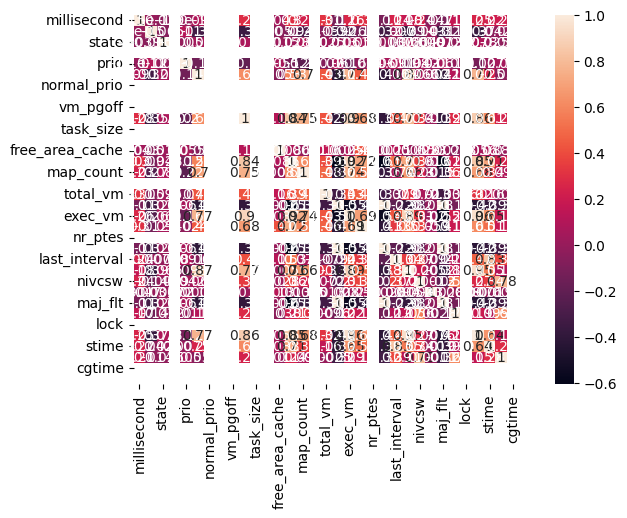

In [12]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

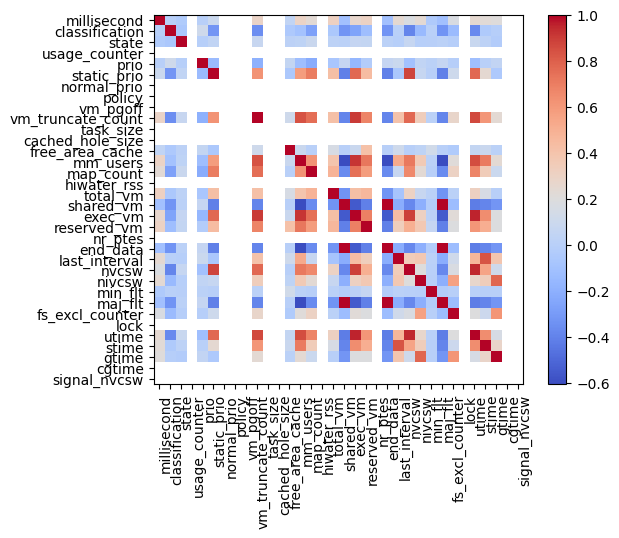

In [13]:
corr = data.corr()
fig, ax = plt.subplots()
im = ax.imshow(corr, cmap='coolwarm')
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
plt.show()

In [14]:
X2 = data.drop(["classification",'vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime'],axis=1)
X1 = data.drop(["classification",'usage_counter','normal_prio','policy','vm_pgoff', 'task_size', 'cached_hole_size', 'hiwater_rss', 'nr_ptes','signal_nvcsw','cgtime', 'lock'],axis=1)
Y = data["classification"]

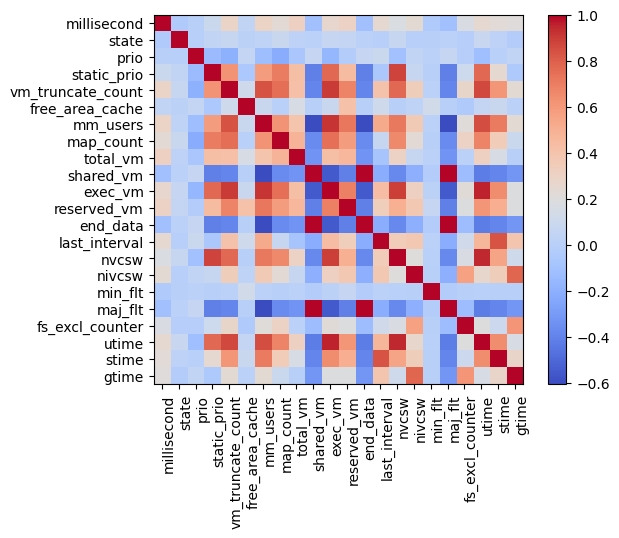

In [15]:
corr = X1.corr()
fig, ax = plt.subplots()
im = ax.imshow(corr, cmap='coolwarm')
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
plt.show()


## Models (RF, XG, ANN)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=1)

### Random Forest

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import time
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 1, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 10)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
rfc_acc=accuracy_score(y_test,y_pred)
print(rfc_acc)


0.7769


In [ ]:
print('Classification Report : ')
print(classification_report(y_test, y_pred))

Training accuracy score of the model is: 77.745 %
Testing accuracy score of the model is: 77.69 %
Confusion matrix of the model 
 [[8896 1142]
 [3320 6642]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.73      0.89      0.80     10038
           1       0.85      0.67      0.75      9962

    accuracy                           0.78     20000
   macro avg       0.79      0.78      0.77     20000
weighted avg       0.79      0.78      0.77     20000



In [ ]:
predictions = rfc.predict(X_train)
print(classification_report(y_test, y_pred))

print()
print("accuracy_score", accuracy_score(y_test, y_pred))

rfc_cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix of the model \n",rfc_cm)

print()
y_pred_proba = rfc.predict_proba(X_test)
print("roc-auc score for the class 1, from target 'HasDetections' ", roc_auc_score(y_test, y_pred_proba[:,1]))

print()
y_pred_proba = rfc.predict_proba(X_test)
print("roc-auc score for the class 0, from target 'HasDetections' ", roc_auc_score(y_test, y_pred_proba[:,0]))

print()
print("elapsed time in seconds: ", time.time() - start_time)

              precision    recall  f1-score   support

           0       0.73      0.89      0.80     10038
           1       0.85      0.67      0.75      9962

    accuracy                           0.78     20000
   macro avg       0.79      0.78      0.77     20000
weighted avg       0.79      0.78      0.77     20000


accuracy_score 0.7769

roc-auc score for the class 1, from target 'HasDetections'  0.7954229809078444

roc-auc score for the class 0, from target 'HasDetections'  0.20457701909215567

elapsed time in seconds:  0.7122328281402588


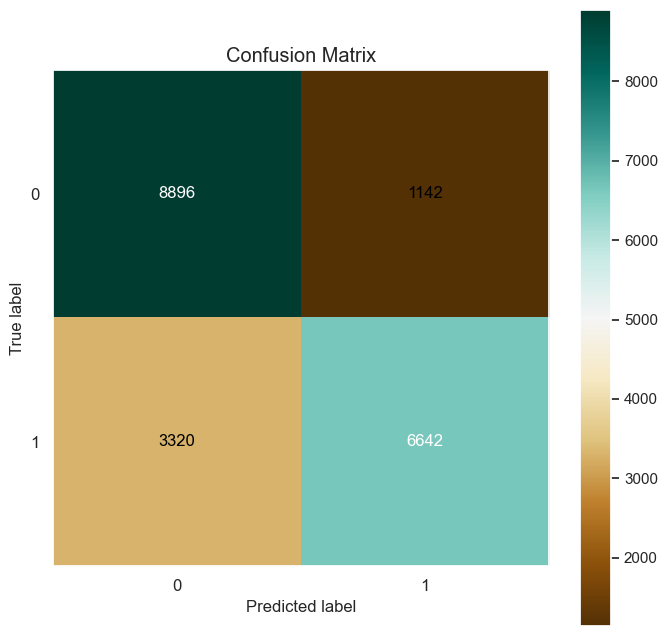

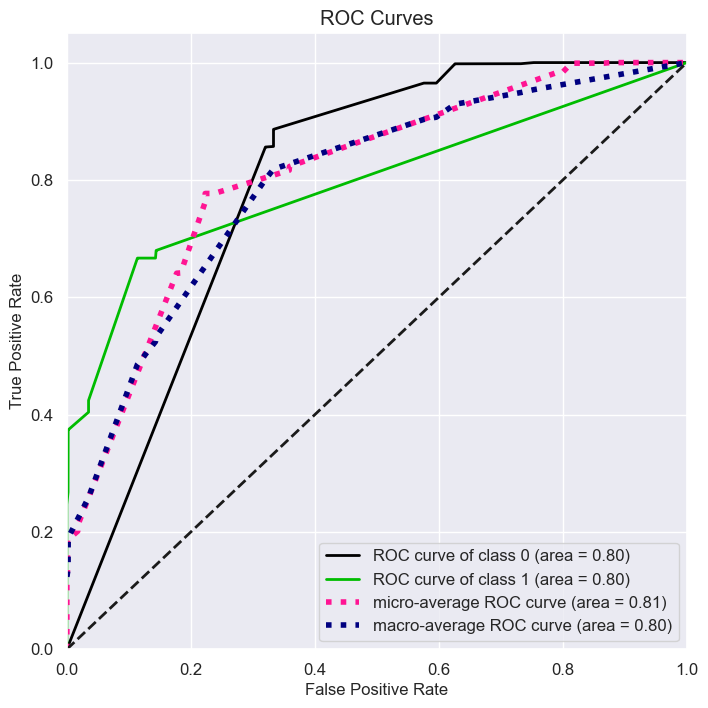

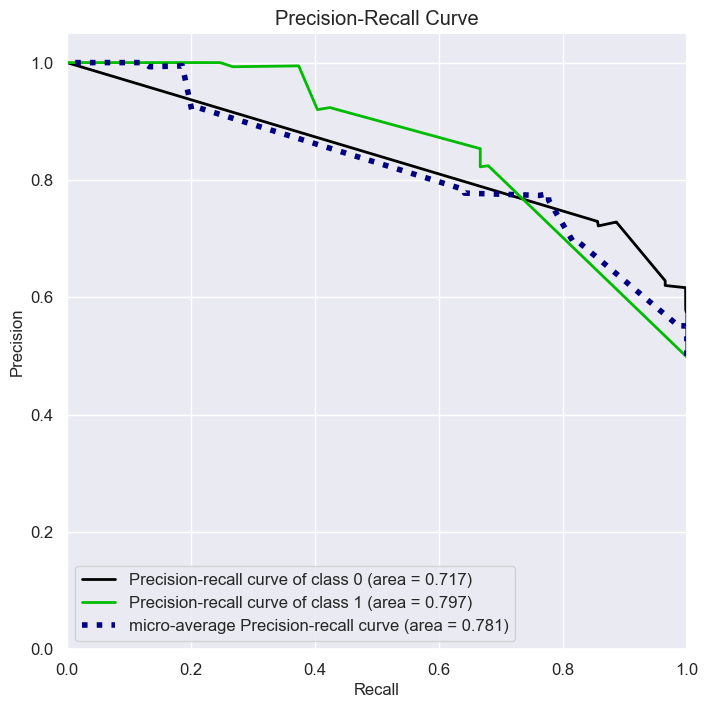

In [20]:
#sns.set_theme(rc={'figure.figsize':(8,8)})
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap="BrBG")

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(y_test, y_pred_proba)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(y_test, y_pred_proba)

sns.set(rc={'figure.figsize':(12, 18)})



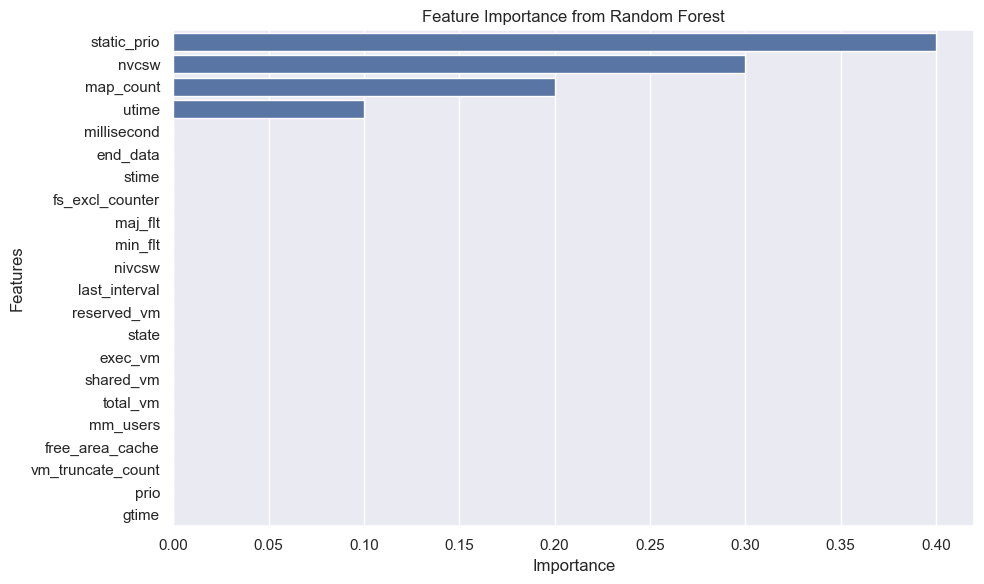

In [21]:
importances = rfc.feature_importances_
feature_names = X_test.columns
indices = np.argsort(importances)[::-1]  # Sort from most to least important

feat_imp = pd.Series(importances, index=feature_names)
feat_imp = feat_imp.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [22]:
#Accuracy: 0.7969, Precision: 0.9421, Recall: 0.6310, F1-score: 0.7558

### XGBoost

In [ ]:
start_time = time.time()
clf_xgb = xgb.XGBClassifier(learning_rate=0.1, 
                            n_estimators=1000, 
                            max_depth=5,
                            min_child_weight=1,
                            gamma=0,
                            subsample=0.9,
                            colsample_bytree=0.6,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0,
                            reg_lambda = 1,
                            seed=42)

In [24]:
clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)]) 
            #,early_stopping_rounds=100, eval_metric='auc', verbose=100)

predictions = clf_xgb.predict(X_test)


[0]	validation_0-logloss:0.61413	validation_1-logloss:0.61378
[1]	validation_0-logloss:0.55207	validation_1-logloss:0.55177
[2]	validation_0-logloss:0.49039	validation_1-logloss:0.49003
[3]	validation_0-logloss:0.43701	validation_1-logloss:0.43655
[4]	validation_0-logloss:0.38978	validation_1-logloss:0.38943
[5]	validation_0-logloss:0.35489	validation_1-logloss:0.35440
[6]	validation_0-logloss:0.32290	validation_1-logloss:0.32242
[7]	validation_0-logloss:0.28869	validation_1-logloss:0.28806
[8]	validation_0-logloss:0.25986	validation_1-logloss:0.25915
[9]	validation_0-logloss:0.23289	validation_1-logloss:0.23206
[10]	validation_0-logloss:0.21067	validation_1-logloss:0.20969
[11]	validation_0-logloss:0.19222	validation_1-logloss:0.19121
[12]	validation_0-logloss:0.17824	validation_1-logloss:0.17727
[13]	validation_0-logloss:0.16574	validation_1-logloss:0.16480
[14]	validation_0-logloss:0.15197	validation_1-logloss:0.15109
[15]	validation_0-logloss:0.14068	validation_1-logloss:0.13968
[1

In [25]:
print(classification_report(y_test, predictions))

print()
print("accuracy_score", accuracy_score(y_test, predictions))

rfc_cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix of the model \n",rfc_cm)

print()
predictions_probas = clf_xgb.predict_proba(X_test)
print("roc-auc score for the class 1, from target 'HasDetections' ", roc_auc_score(y_test, predictions_probas[:,1]))

print()
predictions_probas = clf_xgb.predict_proba(X_test)
print("roc-auc score for the class 0, from target 'HasDetections' ", roc_auc_score(y_test, predictions_probas[:,0]))

print()
print("elapsed time in seconds: ", time.time() - start_time)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14969
           1       1.00      1.00      1.00     15031

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000


accuracy_score 1.0

roc-auc score for the class 1, from target 'HasDetections'  1.0

roc-auc score for the class 0, from target 'HasDetections'  0.0

elapsed time in seconds:  38.41999125480652


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

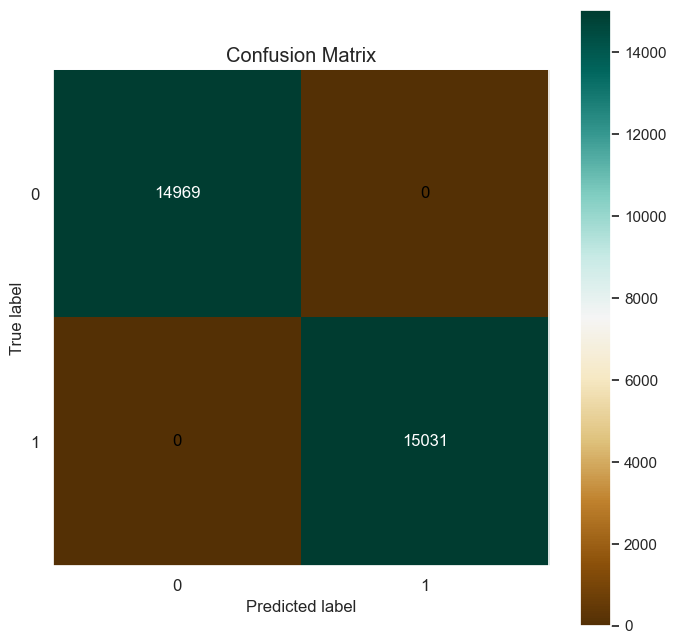

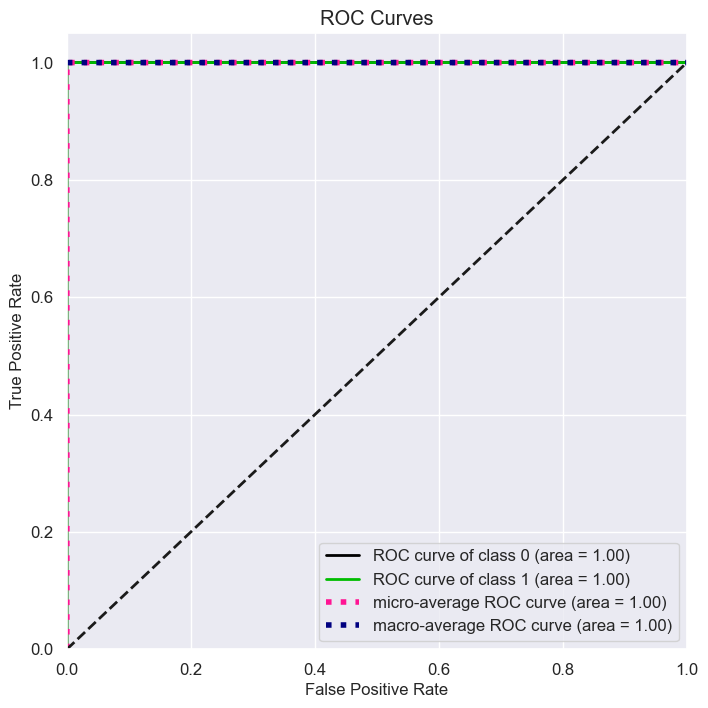

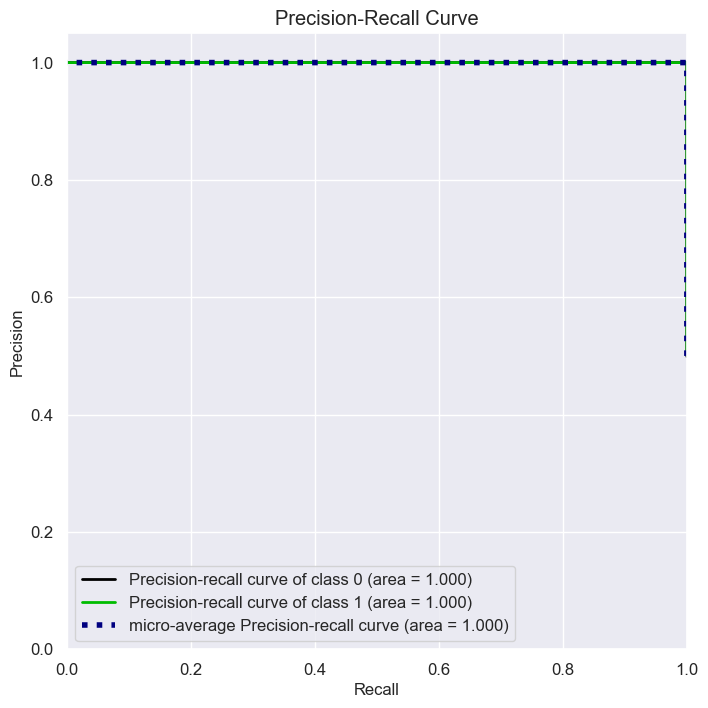

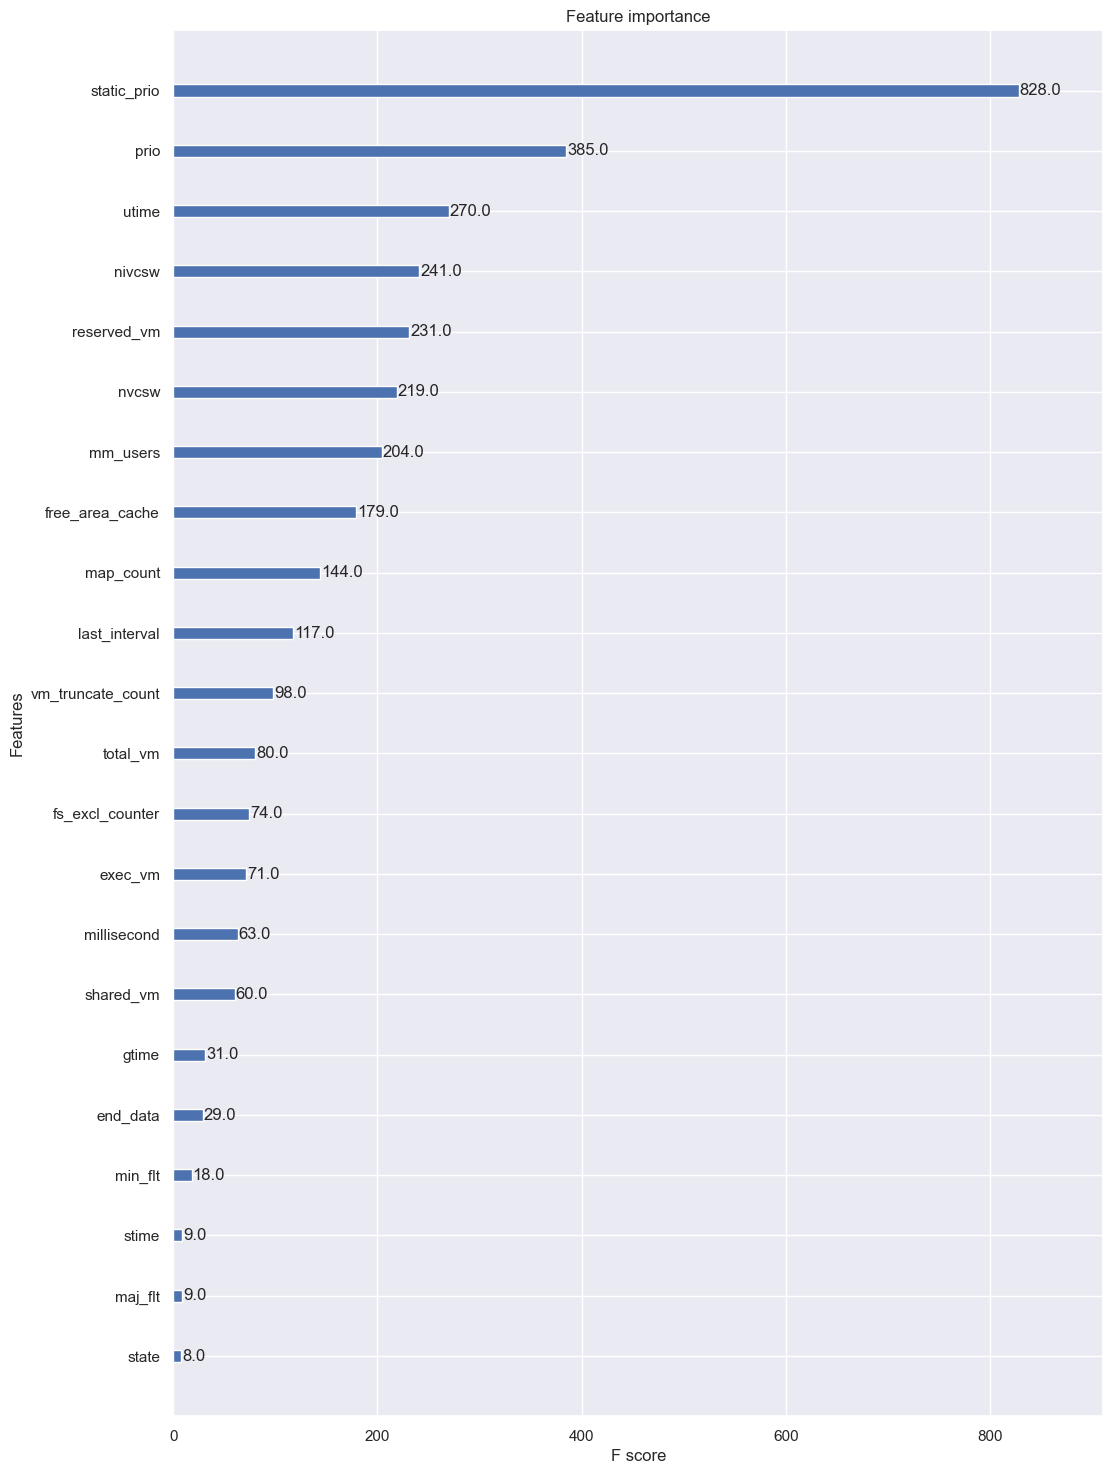

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_test, predictions, cmap="BrBG")

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(y_test, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(y_test, predictions_probas)

sns.set(rc={'figure.figsize':(12, 18)})
xgb.plot_importance(clf_xgb, title='Feature importance', xlabel='F score', ylabel='Features')


## GAN for Synthetic Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=1)
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 1, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 10)

In [ ]:
start_time = time.time()
clf_xgb = xgb.XGBClassifier(learning_rate=0.1, 
                            n_estimators=1000, 
                            max_depth=5,
                            min_child_weight=1,
                            gamma=0,
                            subsample=0.9,
                            colsample_bytree=0.6,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0,
                            reg_lambda = 1,
                            seed=42)

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class Generator(nn.Module):
    def __init__(self, input_size, output_size):
        super(Generator, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

input_size = X_train.shape[1]
generator = Generator(input_size, input_size)
discriminator = Discriminator(input_size)
optimizer_G = optim.Adam(generator.parameters(), lr=0.001)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.001)
criterion = nn.BCELoss()

In [32]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for batch_idx, (real_data, _) in enumerate(train_loader):
        # Train Discriminator
        optimizer_D.zero_grad()
        real_output = discriminator(real_data)
        real_loss = criterion(real_output, torch.ones_like(real_output))
        
        z = torch.randn(batch_size, input_size)
        fake_data = generator(z)
        fake_output = discriminator(fake_data.detach())
        fake_loss = criterion(fake_output, torch.zeros_like(fake_output))
        
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()
        
        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, input_size)
        fake_data = generator(z)
        g_output = discriminator(fake_data)
        g_loss = criterion(g_output, torch.ones_like(g_output))
        
        g_loss.backward()
        optimizer_G.step()

        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch}/{num_epochs}], Batch [{batch_idx}/{len(train_loader)}], "
                  f"Discriminator Loss: {d_loss.item()}, Generator Loss: {g_loss.item()}")

# Generate synthetic data
synthetic_data = generator(torch.randn(len(X_train), input_size)).detach().numpy()

Epoch [0/100], Batch [0/1250], Discriminator Loss: 100.64812469482422, Generator Loss: 0.745978593826294
Epoch [0/100], Batch [100/1250], Discriminator Loss: 100.29118347167969, Generator Loss: 1.3844540119171143
Epoch [0/100], Batch [200/1250], Discriminator Loss: 100.16687774658203, Generator Loss: 1.8896586894989014
Epoch [0/100], Batch [300/1250], Discriminator Loss: 100.11627197265625, Generator Loss: 2.2219505310058594
Epoch [0/100], Batch [400/1250], Discriminator Loss: 100.09050750732422, Generator Loss: 2.4589312076568604
Epoch [0/100], Batch [500/1250], Discriminator Loss: 100.07984924316406, Generator Loss: 2.5993969440460205
Epoch [0/100], Batch [600/1250], Discriminator Loss: 100.07205200195312, Generator Loss: 2.6855320930480957
Epoch [0/100], Batch [700/1250], Discriminator Loss: 100.06778717041016, Generator Loss: 2.7178077697753906
Epoch [0/100], Batch [800/1250], Discriminator Loss: 100.06649780273438, Generator Loss: 2.7428905963897705
Epoch [0/100], Batch [900/1250]

In [ ]:
# Combine synthetic and real data
combined_data = np.concatenate((X_train.values, synthetic_data), axis=0)
combined_labels = np.concatenate((y_train, np.ones(len(X_train))), axis=0)  # Assuming all synthetic data labeled as anomalies (1)
clf_xgb.fit(X_train, y_train)

y_pred = clf_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


In [51]:
clf_xgb.fit(X_train, y_train)

y_pred = clf_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10038
           1       1.00      1.00      1.00      9962

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

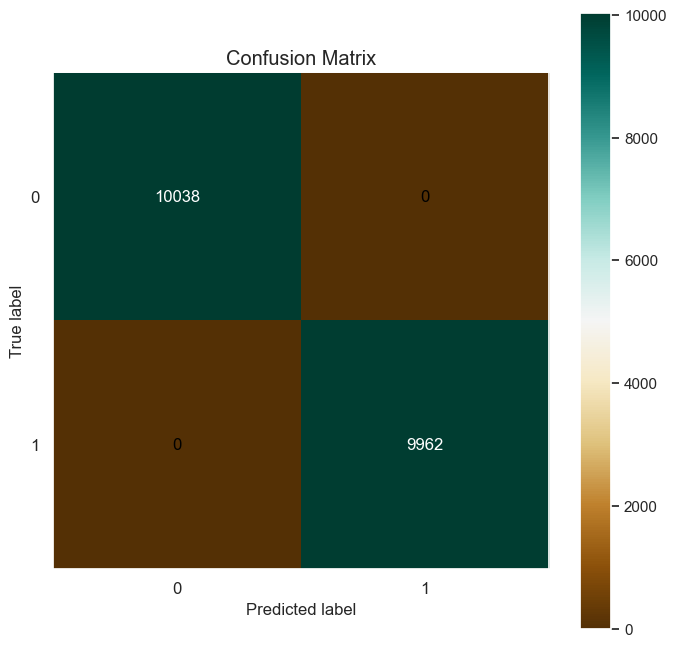

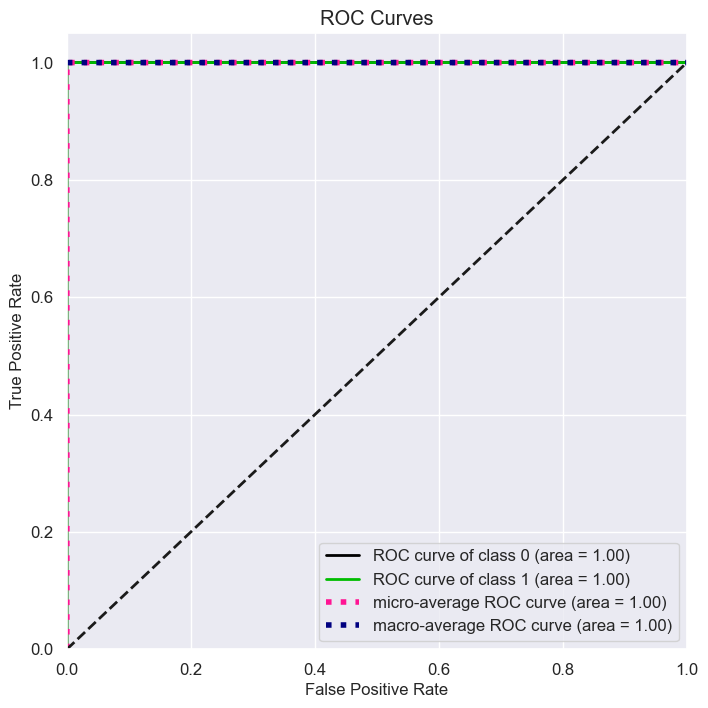

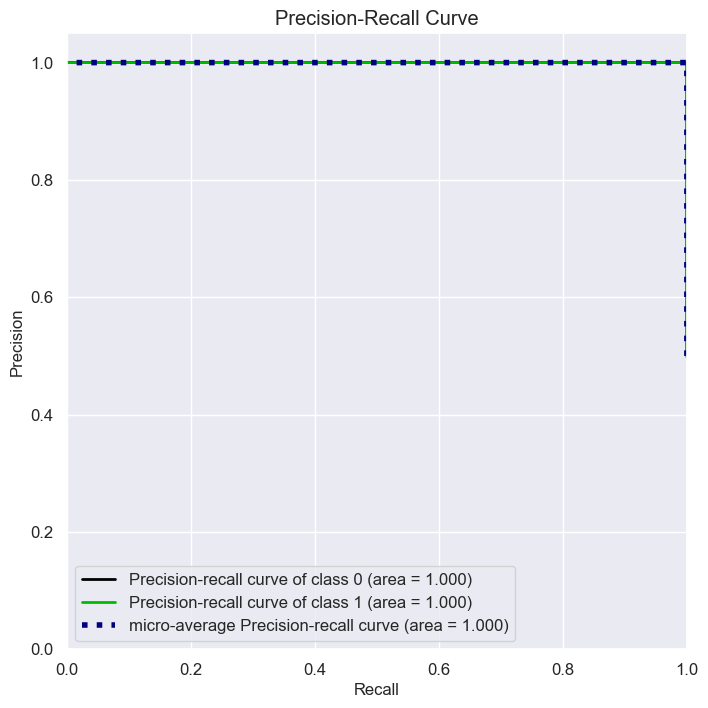

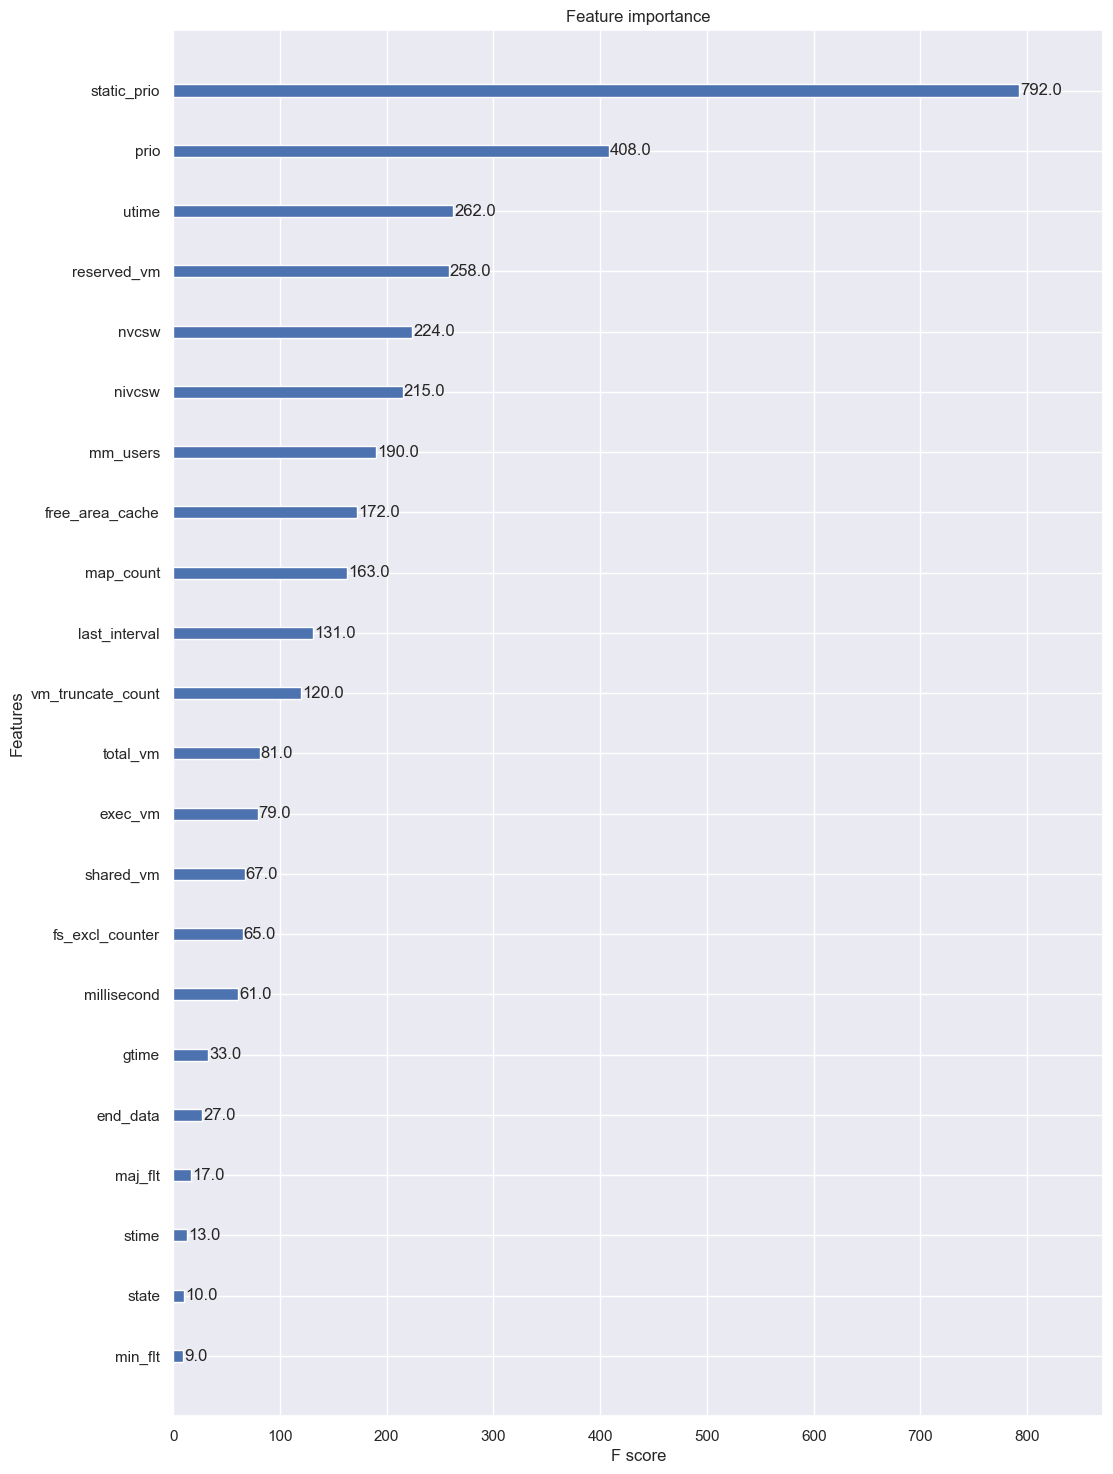

In [ ]:
y_pred_probas = clf_xgb.predict_proba(X_test)
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap="BrBG")

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(y_test, y_pred_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(y_test, y_pred_probas)
sns.set(rc={'figure.figsize':(12, 18)})
xgb.plot_importance(clf_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

In [36]:
#rfc = RandomForestClassifier(criterion = 'gini', max_depth = 1, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 10)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

Accuracy: 0.7893, Precision: 0.9442, Recall: 0.6132, F1-score: 0.7435


In [50]:
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.94      0.79     10038
           1       0.91      0.55      0.68      9962

    accuracy                           0.75     20000
   macro avg       0.79      0.75      0.74     20000
weighted avg       0.79      0.75      0.74     20000



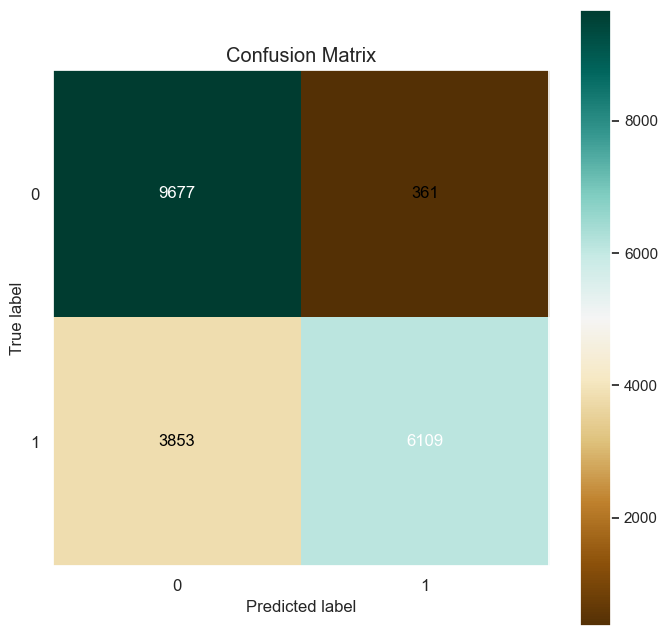

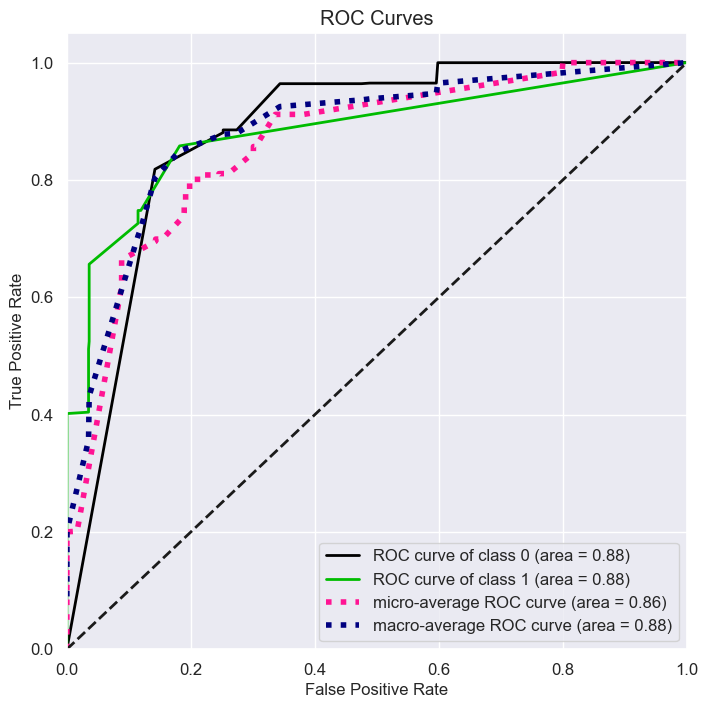

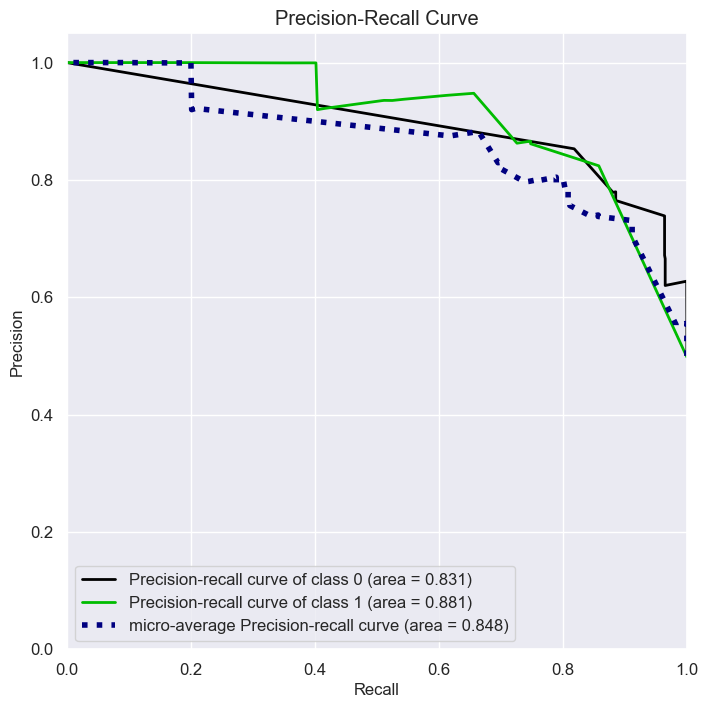

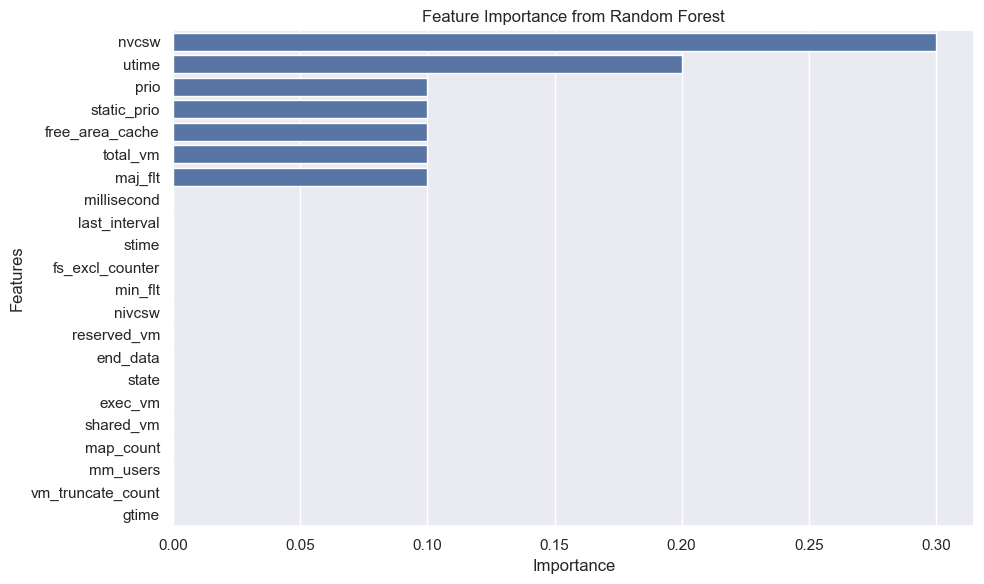

In [ ]:
y_pred_probas = rfc.predict_proba(X_test)
#sns.set_theme(rc={'figure.figsize':(8,8)})
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap="BrBG")

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(y_test, y_pred_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(y_test, y_pred_probas)

sns.set(rc={'figure.figsize':(12, 18)})

importances = rfc.feature_importances_
feature_names = X_test.columns
indices = np.argsort(importances)[::-1]  # Sort from most to least important

feat_imp = pd.Series(importances, index=feature_names)
feat_imp = feat_imp.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()